In [2]:
from mlwpy import *
%matplotlib inline

In [3]:
diabetes = datasets.load_diabetes()

tts = skms.train_test_split(diabetes.data,
                            diabetes.target,
                            test_size=.25)

(diabetes_train_ftrs, diabetes_test_ftrs,
 diabetes_train_tgt,  diabetes_test_tgt) = tts

In [4]:
diabetes_df = pd.DataFrame(diabetes.data,
                           columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.0381,0.0507,0.0617,0.0219,-0.0442,-0.0348,-0.0434,-0.0026,0.0199,-0.0176,151.0000
1,-0.0019,-0.0446,-0.0515,-0.0263,-0.0084,-0.0192,0.0744,-0.0395,-0.0683,-0.0922,75.0000
2,0.0853,0.0507,0.0445,-0.0057,-0.0456,-0.0342,-0.0324,-0.0026,0.0029,-0.0259,141.0000
3,-0.0891,-0.0446,-0.0116,-0.0367,0.0122,0.0250,-0.0360,0.0343,0.0227,-0.0094,206.0000
4,0.0054,-0.0446,-0.0364,0.0219,0.0039,0.0156,0.0081,-0.0026,-0.0320,-0.0466,135.0000


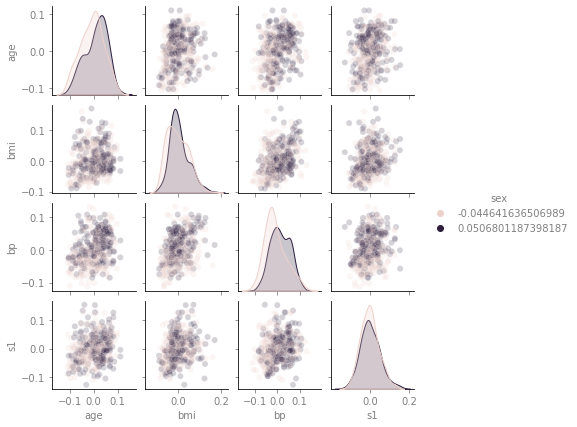

In [5]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']],
             size=1.5, hue='sex', plot_kws={'alpha':.2});

In [6]:
values = np.array([1, 3, 5, 8, 11, 13, 15])
print("no outlier")
print(np.mean(values),
      np.median(values))

values_with_outlier = np.array([1, 3, 5, 8, 11, 13, 40])
print("with outlier")
print("%5.2f" % np.mean(values_with_outlier),
      np.median(values_with_outlier))

no outlier
8.0 8.0
with outlier
11.57 8.0


In [7]:
distances = np.array([2.0, 4.0, 4.0])
closeness = 1.0 / distances             # element-by-element division
weights = closeness / np.sum(closeness) # normalize sum to one
weights

array([0.5 , 0.25, 0.25])

In [8]:
knn   = neighbors.KNeighborsRegressor(n_neighbors=3)
fit   = knn.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

# evaluate our predictions against the held-back testing targets
metrics.mean_squared_error(diabetes_test_tgt, preds)

3471.41941941942

In [9]:
def axis_helper(ax, lims):
    'clean up axes'
    ax.set_xlim(lims); ax.set_xticks([])
    ax.set_ylim(lims); ax.set_yticks([])
    ax.set_aspect('equal')

# our data is very simple: two (x, y) points
D = np.array([[3, 5],
              [4, 2]])

# we'll take x as our "input" and y as our "output"
x, y = D[:, 0], D[:, 1]